# Simple Neural Network for MNIST Recognition


This is a draft of a simple neural network with 2 layers for recognition numbers in the pictures from MNIST collection

In [0]:
from tensorflow.python.keras.datasets import mnist

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils
from scipy.misc import toimage

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

### Preprocessing data

**Load data**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Print the initial shape of data**

Each image is 28 pixels in height and 28 pixels in width, the numder of train pictures is 60 000, the number of test pictures is 10 000

In [0]:

print('X_test original shape:', X_test.shape)

('X_train original shape:', (60000, 28, 28))
('X_test original shape:', (10000, 28, 28))


**Reshape the data**

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

**Normalize the data**

In [0]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

**Print the shape of data after preprocessing**


In [0]:
print('X_train shape:', X_train.shape)
print('X_train shape:', X_test.shape)


('X_train shape:', (60000, 784))
('X_train shape:', (10000, 784))


**# One Hot Encoding**

This step helps turn data to 10 separate features were all of them are equal 0 except the one which equals 1.


In [0]:
n = 50

Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

print(Y_train[n])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Building Neural Network

**Build a Sequential Model**

In [0]:
model = Sequential()

**Create network layers**

In [0]:
model.add(Dense(900, input_dim=784, activation="relu"))

model.add(Dense(10, activation="softmax"))

**Compile this model**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
_________________________________________________________________
dense_3 (Dense)              (None, 900)               9900      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                9010      
Total params: 654,920
Trainable params: 654,920
Non-trainable params: 0
_________________________________________________________________
None


### Training Neural Network

In [0]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=15, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 2s - loss: 0.0057 - acc: 0.9984 - val_loss: 0.1332 - val_acc: 0.9753
Epoch 2/15
 - 2s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.1502 - val_acc: 0.9742
Epoch 3/15
 - 2s - loss: 0.0087 - acc: 0.9974 - val_loss: 0.1404 - val_acc: 0.9747
Epoch 4/15
 - 2s - loss: 0.0049 - acc: 0.9985 - val_loss: 0.1293 - val_acc: 0.9777
Epoch 5/15
 - 2s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.1308 - val_acc: 0.9775
Epoch 6/15
 - 2s - loss: 0.0096 - acc: 0.9973 - val_loss: 0.1552 - val_acc: 0.9711
Epoch 7/15
 - 2s - loss: 0.0146 - acc: 0.9957 - val_loss: 0.1297 - val_acc: 0.9762
Epoch 8/15
 - 2s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.1280 - val_acc: 0.9771
Epoch 9/15
 - 2s - loss: 0.0044 - acc: 0.9985 - val_loss: 0.1236 - val_acc: 0.9779
Epoch 10/15
 - 2s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.1236 - val_acc: 0.9794
Epoch 11/15
 - 2s - loss: 0.0011 - acc: 0.9998 - val_loss: 0.1140 - val_acc: 0.9798
Epoch 12/15
 - 2s - loss: 4.4131e-0

### Evaluating Test Data

**Check the accuracy of this neural network on test data**

In [0]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 97.38%


**The graph showing the accuracy**

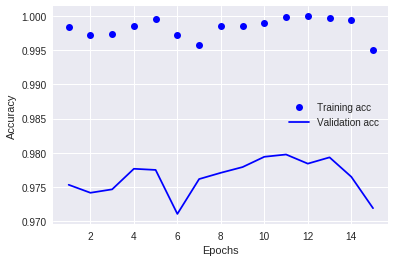

In [0]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recognition

In [0]:
num_pic = 50

**Change image dimension and normalize it**

In [0]:
x = X_test[num_pic]
x = np.expand_dims(x, axis=0)

**Recognition**

In [0]:
prediction = model.predict(x)

In [0]:
print(prediction)

[[1.0618000e-05 1.8044128e-07 2.6126149e-16 2.8116516e-18 5.8542896e-06
  1.4446065e-03 9.9829453e-01 1.3988204e-10 2.4419211e-04 6.4418098e-09]]


**Back from one hot encoding**

In [0]:
prediction = np.argmax(prediction)
print(prediction)

6


**Print right answer**

In [0]:
print(y_test[num_pic])

6
